# Image Data Augmentation with Keras


# Task 1: Import Libraries

In [1]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.2.0-rc3


# Task 2: Rotation

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rotation_range = 40
)

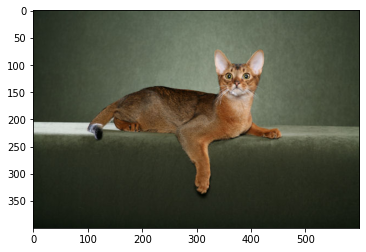

In [5]:
image_path = '/content/Train/Cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 2 classes.


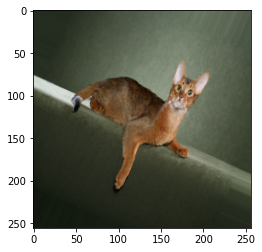

In [9]:
x, y = next(generator.flow_from_directory('Train', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 3: Width and Height Shifts

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    width_shift_range = [-100,-50,0,50,100],
    height_shift_range = [-50,0,50]
)

Found 1 images belonging to 2 classes.


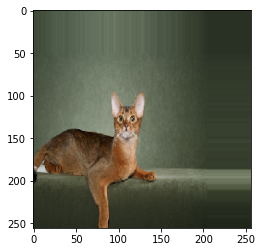

In [14]:
x, y = next(generator.flow_from_directory('Train', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 4: Brightness

Found 1 images belonging to 2 classes.


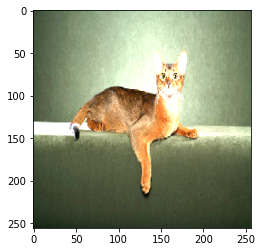

In [19]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    brightness_range = (0.5,2.)
)

x, y = next(generator.flow_from_directory('Train', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 5: Shear Transformation

Found 1 images belonging to 2 classes.


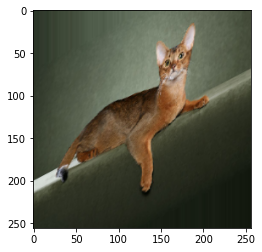

In [20]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    shear_range = 40
)

x, y = next(generator.flow_from_directory('Train', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 6: Zoom

Found 1 images belonging to 2 classes.


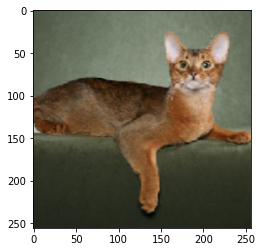

In [40]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    zoom_range = 0.5
)

x, y = next(generator.flow_from_directory('Train', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 7: Channel Shift

Found 1 images belonging to 2 classes.


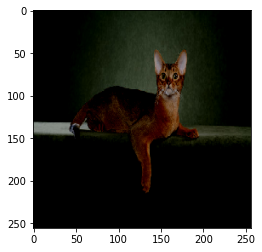

In [43]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    channel_shift_range = 100
)

x, y = next(generator.flow_from_directory('Train', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 8: Flips

Found 1 images belonging to 2 classes.


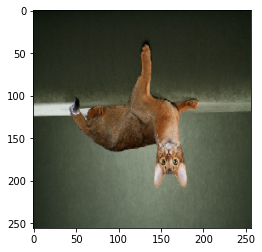

In [53]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    horizontal_flip = True,
    vertical_flip = True
)

x, y = next(generator.flow_from_directory('Train', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 9: Normalization

### Featurewise

In [54]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    featurewise_center = True,
    featurewise_std_normalization = True
)

generator.fit(x_train)

170500096/170498071 [==============================] - 7s 0us/step


In [56]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

0.32032177 0.49851355 [[5]]
120.70756512369792


### Samplewise

In [57]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    samplewise_center = True,
    samplewise_std_normalization = True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

7.947286e-08 0.99999994 [[4]]


# Task 10: Rescale and Preprocessing Function

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rescale = 1.,
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input
)

In [0]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [61]:
print(x.mean(), x.std(), y)

-0.22815818 0.2905601 [[2]]


# Task 11: Using in Model Training

In [0]:
# Your code here
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip = True,
    rotation_range = 20
)

In [82]:
# Your code here
model = tf.keras.models.Sequential([
      tf.keras.applications.mobilenet_v2.MobileNetV2(
          include_top = False,
          input_shape = (32,32,3),
          pooling = 'avg'
      ),
      tf.keras.layers.Dense(10, activation= 'softmax')
                                    
])

model.compile(
    loss = 'sparse_categorical_crossentropy', 
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [85]:
_ = model.fit(
    generator.flow(x_train, y_train, batch_size= 32), validation_data = (x_test,y_test),epochs = 1,steps_per_epoch = 1000)

1000/1000 [==============================] - 24s 24ms/step - loss: 1.7844 - accuracy: 0.1006 - val_loss: 5.3372 - val_accuracy: 0.9526
